In [32]:
import sys, os
from pathlib import Path
sys.path.append(os.path.abspath(Path().resolve().parent/'src'))

from kinematicsrobotics.datahandler import Extract
from kinematicsrobotics.model import Model
from kinematicsrobotics.metrics import Metrics

In [66]:
ext = Extract()
ext._path_project = os.path.abspath(Path().resolve().parent)

dataset = ext.dataframe(r'src\data\ready\datase-radius-1cm.csv')

x_train = ext.dataframe( r'src\data\ready\data-r1cm-split-global\train\x_train.csv')
y_train = ext.dataframe( r'src\data\ready\data-r1cm-split-global\train\y_train.csv')

x_test = ext.dataframe( r'src\data\ready\data-r1cm-split-global\test\x_test.csv')
y_test = ext.dataframe( r'src\data\ready\data-r1cm-split-global\test\y_test.csv')


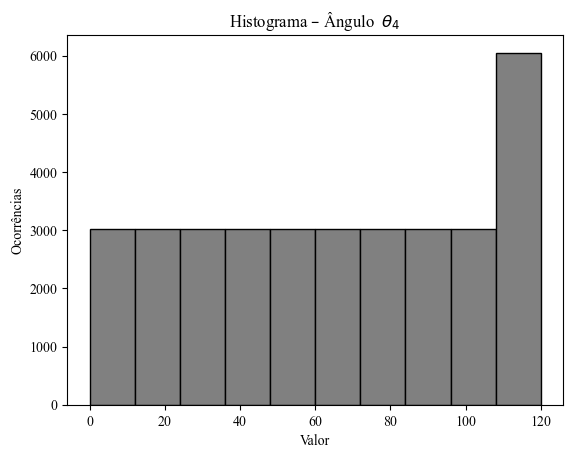

In [70]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.hist(dataset[['theta_4']], color='gray', edgecolor='black')

# Adicionar título e rótulos
plt.title("Histograma – Ângulo  $\\theta_4$")
plt.xlabel("Valor")
plt.ylabel("Ocorrências")

# Exibir o gráfico
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x = scaler_x.fit_transform(x_train)
x_t = scaler_x.transform(x_test)

y = scaler_y.fit_transform(y_train)
y_t = scaler_y.transform(y_test)

In [20]:
mlp = Model.mlp_regressor(EPOCHS_NOCHANGE=30, ERROR=0.001)

In [21]:
# Estimação de hiperparâmetros
history = ext.dataframe(r'src\data\history\parametersearch-mlp-global\cv_results.csv')

history_best = history[history['rank_test_neg_mse'] == 1]

params = eval(history_best.iloc[0]['params'])

mlp.set_model(**params)

In [23]:
history.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_r2,split1_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,...,std_train_r2,split0_test_neg_mse,split1_test_neg_mse,mean_test_neg_mse,std_test_neg_mse,rank_test_neg_mse,split0_train_neg_mse,split1_train_neg_mse,mean_train_neg_mse,std_train_neg_mse
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,...,2.000000e+03,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,12.011566,1.693788,0.010495,0.001421,0.955648,0.953062,0.954355,4.126362e-03,1000.500000,0.956959,...,3.643229e-03,-0.043366,-0.047537,-0.045452,4.715591e-03,1000.500000,-0.043165,-0.043791,-0.043478,3.681538e-03
std,8.288656,3.172073,0.013639,0.004090,0.125653,0.127526,0.124069,2.484343e-02,577.494589,0.121671,...,2.399128e-02,0.122763,0.128582,0.123175,2.474106e-02,577.494589,0.122039,0.122841,0.120011,2.399025e-02
min,1.255382,0.000132,0.000296,0.000000,0.511660,0.498691,0.510413,1.099683e-07,1.000000,0.527916,...,5.546494e-08,-0.477021,-0.505802,-0.485962,4.319478e-07,1.000000,-0.473518,-0.472387,-0.470417,9.063611e-07
25%,5.965603,0.381341,0.003997,0.000072,0.989766,0.987640,0.988960,4.783055e-04,500.750000,0.989842,...,2.972801e-04,-0.010026,-0.012740,-0.011123,5.875584e-04,500.750000,-0.010181,-0.010146,-0.010052,3.091129e-04
50%,9.766194,0.924227,0.006466,0.000494,0.992486,0.990972,0.991675,1.054781e-03,1000.500000,0.992604,...,6.583802e-04,-0.007371,-0.009307,-0.008387,1.247856e-03,1000.500000,-0.007412,-0.007305,-0.007434,6.848776e-04
75%,16.189596,1.936955,0.011096,0.000994,0.994918,0.993323,0.994038,1.826018e-03,1500.250000,0.995068,...,1.248884e-03,-0.004986,-0.006887,-0.006021,2.173442e-03,1500.250000,-0.004943,-0.005114,-0.005059,1.332812e-03
max,97.084440,69.936705,0.134609,0.073960,0.997681,0.997710,0.997316,2.272231e-01,2000.000000,0.998151,...,2.181932e-01,-0.002279,-0.002348,-0.002697,2.295566e-01,2000.000000,-0.001853,-0.001829,-0.002242,2.176745e-01


In [33]:
history[['rank_test_neg_mse','mean_train_neg_mse', 'mean_test_neg_mse','mean_train_r2','mean_test_r2','params']].loc[history['rank_test_neg_mse'] <=10].sort_values(by='rank_test_neg_mse')

,rank_test_neg_mse,mean_train_neg_mse,mean_test_neg_mse,mean_train_r2,mean_test_r2,params
984,1,-0.002242,-0.002697,0.997756,0.997316,"{'hidden_layer_sizes': (320, 375, 265, 155), '..."
1188,2,-0.002319,-0.002939,0.997678,0.997085,"{'hidden_layer_sizes': (155, 375, 155, 375), '..."
590,3,-0.002514,-0.002984,0.997483,0.997028,"{'hidden_layer_sizes': (450, 415, 485), 'activ..."
1852,4,-0.002496,-0.003000,0.997502,0.997026,"{'hidden_layer_sizes': (450, 345, 415), 'activ..."
202,5,-0.002550,-0.003042,0.997444,0.996991,"{'hidden_layer_sizes': (375, 320, 320, 265), '..."
1215,6,-0.002530,-0.003200,0.997467,0.996829,"{'hidden_layer_sizes': (210, 375, 375, 100), '..."
462,7,-0.002682,-0.003309,0.997314,0.996723,"{'hidden_layer_sizes': (450, 310, 205), 'activ..."
1265,8,-0.002587,-0.003316,0.997410,0.996714,"{'hidden_layer_sizes': (415, 310, 380), 'activ..."
1333,9,-0.002872,-0.003332,0.997124,0.996698,"{'hidden_layer_sizes': (265, 320, 155, 210), '..."
895,10,-0.002499,-0.003343,0.997497,0.996693,"{'hidden_layer_sizes': (345, 485, 205), 'activ..."


In [38]:
history[['rank_test_neg_mse','param_hidden_layer_sizes','param_activation']].loc[history['rank_test_neg_mse'] <=10].sort_values(by='rank_test_neg_mse')

,rank_test_neg_mse,param_hidden_layer_sizes,param_activation
984,1,"(320, 375, 265, 155)",relu
1188,2,"(155, 375, 155, 375)",relu
590,3,"(450, 415, 485)",relu
1852,4,"(450, 345, 415)",relu
202,5,"(375, 320, 320, 265)",relu
1215,6,"(210, 375, 375, 100)",relu
462,7,"(450, 310, 205)",relu
1265,8,"(415, 310, 380)",relu
1333,9,"(265, 320, 155, 210)",relu
895,10,"(345, 485, 205)",relu


In [ ]:
'rank_test_r2'
'rank_test_neg_mse'

In [71]:
mlp.fit(x = x, y = y)

Iteration 1, loss = 0.19358936
Validation score: 0.859390
Iteration 2, loss = 0.04219674
Validation score: 0.949933
Iteration 3, loss = 0.02092082
Validation score: 0.966681
Iteration 4, loss = 0.01435736
Validation score: 0.975971
Iteration 5, loss = 0.01129970
Validation score: 0.978641
Iteration 6, loss = 0.00902919
Validation score: 0.982716
Iteration 7, loss = 0.00817170
Validation score: 0.983778
Iteration 8, loss = 0.00809206
Validation score: 0.986432
Iteration 9, loss = 0.00805145
Validation score: 0.985452
Iteration 10, loss = 0.00587164
Validation score: 0.989321
Iteration 11, loss = 0.00512783
Validation score: 0.990966
Iteration 12, loss = 0.00458701
Validation score: 0.989633
Iteration 13, loss = 0.00414982
Validation score: 0.991555
Iteration 14, loss = 0.00430531
Validation score: 0.989348
Iteration 15, loss = 0.00397710
Validation score: 0.992207
Iteration 16, loss = 0.00386667
Validation score: 0.992032
Iteration 17, loss = 0.00390823
Validation score: 0.991127
Iterat

Text(0, 0.5, 'MSE')

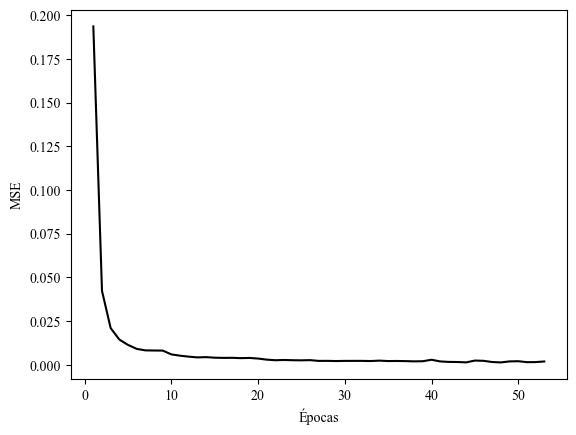

In [75]:
plt.rcParams["font.family"] = "Times New Roman"

loss = mlp._model.loss_curve_

plt.plot(range(1,len(loss)+1), loss, color='black')
plt.xlabel("Épocas")
plt.ylabel("MSE")

In [80]:
from kinematicsrobotics.kinematics import Robo
Elos = [['theta_1',10,0,90,0],
        ['theta_2',0,18,180,0],
        ['theta_3',0,18,-180,0],
        ['theta_4',0,0,90,90],
        ['theta_5',18,0,0,0]
]

robo = Robo("Robo", Elos)


metric = Metrics(model = mlp,
                 scaler_x=scaler_x, 
                 scaler_y=scaler_y,
                 robo=robo)

In [16]:
metric.mse(real = y, predict=mlp.predict(x = x))

array([0.00071128, 0.00166185, 0.00372762, 0.00219248])

In [76]:
metric.mse_joint(x = x, y=y)

array([0.93818791, 1.68708617, 4.44305936, 3.07662598])

In [77]:
metric.mse_joint(x = x_t, y=y_t)

array([0.97741577, 1.75328795, 4.22100959, 3.38836091])

In [5]:
# import numpy as np

# def zscore(data, mean, scale):
#     return (data - mean)/scale
# x = zscore(x_train, np.array(static_x['Média']), np.array(static_x['Desvio Padrão']))
# y = zscore(y_train, np.array(static_y['Média']), np.array(static_y['Desvio Padrão']))

# x_t = zscore(x_test, np.array(static_x['Média']), np.array(static_x['Desvio Padrão']))
# y_t = zscore(y_test, np.array(static_y['Média']), np.array(static_y['Desvio Padrão']))

In [81]:
metric.mse_operacional(x=x)

array([0.23720955, 0.17634223, 0.18422898])

In [82]:
metric.mse_operacional(x=x_t)

array([0.24060324, 0.18104493, 0.19386069])